In [9]:
%matplotlib inline
from __future__ import print_function

import os
import subprocess

import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from decimal import Decimal

In [10]:
def get_data():
    """Get the data, from local csv or pandas repo."""
    if os.path.exists("Leaf.csv"):
        print("-- data.csv found locally")
        df = pd.read_csv("Leaf.csv")
    return df

In [11]:
df = get_data()
df.dropna(inplace=True)

-- data.csv found locally


In [14]:
df.drop(columns=['id'], inplace=True)

In [15]:
def encode_target(df, target_column):
    """Add column to df with integers for the target.

    Args
    ----
    df -- pandas DataFrame.
    target_column -- column to map to int, producing
                     new Target column.

    Returns
    -------
    df_mod -- modified DataFrame.
    targets -- list of target names.
    """
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Target"] = df_mod[target_column].replace(map_to_int)

    return (df_mod, targets)

In [16]:
df2, targets = encode_target(df, "species")
print("* df2.head()", df2[["Target", "species"]].head(),
      sep="\n", end="\n\n")
print("* df2.tail()", df2[["Target", "species"]].tail(),
      sep="\n", end="\n\n")
#print("* targets", targets, sep="\n", end="\n\n")

* df2.head()
   Target                species
0       0            Acer_Opalus
1       1  Pterocarya_Stenoptera
2       2   Quercus_Hartwissiana
3       3        Tilia_Tomentosa
4       4     Quercus_Variabilis

* df2.tail()
     Target               species
985       5  Magnolia_Salicifolia
986      57           Acer_Pictum
987      55    Alnus_Maximowiczii
988       7         Quercus_Rubra
989      13        Quercus_Afares



In [257]:
#df2

In [258]:
features = list(df.columns[1:])
#print("* features:", features, sep="\n")

In [259]:
y = df2["Target"]
X = df2[features]
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.3)
df_train = X_train.copy()

In [260]:
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)

In [261]:
del X_train['species']
del X_train['Target']
del df_train['species']

In [262]:
#df_train.head()

In [263]:
#X_train.head()

In [264]:
#X_train.shape

In [265]:
dt = DecisionTreeClassifier()
#lm = linear_model.LinearRegression()
#model = lm.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [266]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "Leafdt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [267]:
visualize_tree(dt, features)

In [268]:
del X_test['species']
del X_test["Target"]

In [269]:
predictions = dt.predict(X_test)

In [270]:
#predictions[0:5]

In [271]:
dt.score(X_test, y_test)

0.5757575757575758

In [272]:
trainscore = []
for i in range(2, 100):
    dtest = DecisionTreeClassifier(min_samples_split=2, max_depth=i, random_state=99)
    dtest.fit(X_train, y_train)
    trainscore.append((i, dtest.score(X_train, y_train)))
    
testscore = []
for i in range(2, 100):
    dtest = DecisionTreeClassifier(min_samples_split=2, max_depth=i, random_state=99)
    dtest.fit(X_train, y_train)
    testscore.append((i, dtest.score(X_test, y_test)))
#lm = linear_model.LinearRegression()
#model = lm.fit(X_train, y_train)
#dt.fit(X_train, y_train)

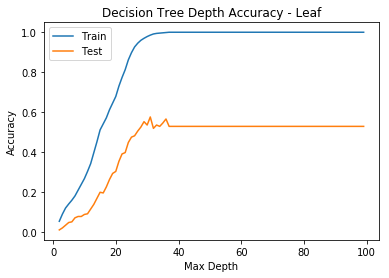

In [273]:
#plt.plot(score)
x_val = [x[0] for x in trainscore]
y_val = [x[1] for x in trainscore]

#print x_val
#plt.figure()

plt.title("Decision Tree Depth Accuracy - Leaf")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(x_val,y_val, label='Train')

x_val_test = [x[0] for x in testscore]
y_val_test = [x[1] for x in testscore]
plt.plot(x_val_test, y_val_test, label='Test')
plt.legend()
plt.savefig("Decision Tree Max Depth - Leaf")
#plt.plot(x_val,y_val,'or')
#plt.show()

In [274]:
trainscore = []
for i in range(2, 100):
    dtest = DecisionTreeClassifier(min_samples_split=i, max_depth=100, random_state=99)
    dtest.fit(X_train, y_train)
    trainscore.append((i, dtest.score(X_train, y_train)))

testscore = []
for i in range(2, 100):
    dtest = DecisionTreeClassifier(min_samples_split=i, max_depth=100, random_state=99)
    dtest.fit(X_train, y_train)
    testscore.append((i, dtest.score(X_test, y_test)))
    

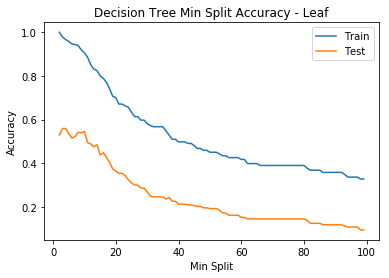

In [275]:
#plt.plot(score)
x_val = [x[0] for x in trainscore]
y_val = [x[1] for x in trainscore]

#print x_val
#plt.figure()

plt.title("Decision Tree Min Split Accuracy - Leaf")
plt.xlabel("Min Split")
plt.ylabel("Accuracy")
plt.plot(x_val,y_val, label='Train')
x_val_test = [x[0] for x in testscore]
y_val_test = [x[1] for x in testscore]
plt.plot(x_val_test, y_val_test, label='Test')
plt.legend()

plt.savefig("Decision Tree Min Split - Leaf")
#plt.plot(x_val,y_val,'or')
#plt.show()

In [276]:
parameters = {'max_depth':[1,5,10,20, 100], 'min_samples_split':[10, 20,100]}
dtc = DecisionTreeClassifier()
dtclf = GridSearchCV(dtc, parameters, cv=3)
dtclf.fit(X_train, y_train)

/Users/abhisheksoni/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 5, 10, 20, 100], 'min_samples_split': [10, 20, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [277]:
dtclf.n_splits_

3

In [278]:
dtclf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [279]:
dtclf.best_score_

0.49927849927849927

In [280]:
dt_best = dtclf.best_estimator_

In [281]:
%%timeit
dt_best.fit(X_train, y_train)

252 ms ± 7.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [282]:
%%timeit
dt_best.score(X_test, y_test)

568 µs ± 58.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [283]:
dt_best.score(X_test, y_test)

0.5353535353535354

In [284]:
dt_train_error = []
dt_test_error = []
for i in range(1, 10):
    X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(df_train, y_train, test_size=i/10.0)
   # print("Train shape", X_train_dt.shape)
  #  print("Test shape", X_test.shape)
    del X_train_dt["Target"]
    dt_best.fit(X_train_dt, y_train_dt)
   # print("Accuracy", dt_best.score(X_train_dt, y_train_dt))
    dt_train_error.append((X_train_dt.shape[0], 1.0 - dt_best.score(X_train_dt, y_train_dt)))
    dt_test_error.append((X_train_dt.shape[0], 1.0 - dt_best.score(X_test, y_test)))

In [285]:
#training_size = [0.72, 0.64, 0.56, 0.48, 0.40, 0.32, 0.24, 0.16, 0.08]

In [286]:
dt_train_error

[(623, 0.1268057784911717),
 (554, 0.14440433212996395),
 (485, 0.17319587628865984),
 (415, 0.19759036144578312),
 (346, 0.26300578034682076),
 (277, 0.3321299638989169),
 (207, 0.2995169082125604),
 (138, 0.33333333333333337),
 (69, 0.4347826086956522)]

In [287]:
dt_test_error

[(623, 0.5252525252525253),
 (554, 0.5454545454545454),
 (485, 0.5353535353535354),
 (415, 0.67003367003367),
 (346, 0.7037037037037037),
 (277, 0.7744107744107744),
 (207, 0.797979797979798),
 (138, 0.8552188552188552),
 (69, 0.9259259259259259)]

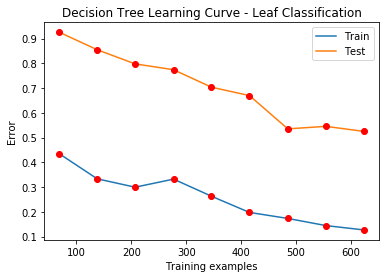

In [288]:
x_val = [x[0] for x in dt_train_error]
y_val = [x[1] for x in dt_train_error]

#print x_val
#plt.figure()

plt.title("Decision Tree Learning Curve - Leaf Classification")
plt.xlabel("Training examples")
plt.ylabel("Error")
plt.plot(x_val,y_val, label='Train')
plt.plot(x_val,y_val,'or')
#plt.show()

x_val_test = [x[0] for x in dt_test_error]
y_val_test = [x[1] for x in dt_test_error]

plt.plot(x_val_test,y_val_test, label='Test')
plt.plot(x_val_test,y_val_test,'or')
plt.legend()
plt.savefig("Leaf DT Learning Curve")
#plt.show()
#plt.plot(dt_train_error)
#plt.plot(dt_test_error)

In [289]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [290]:
knnPredictions = knn.predict(X_test)

In [291]:
knnPredictions[0:5]

array([79, 63, 42, 21, 94])

In [292]:
knn.score(X_test, y_test)

0.8047138047138047

In [293]:
score = []
for i in range(2, 100):
    knntest = KNeighborsClassifier(n_neighbors=i)
    knntest.fit(X_train, y_train)
    score.append((i, knntest.score(X_train, y_train)))
    
testscore = []
for i in range(2, 100):
    knntest = KNeighborsClassifier(n_neighbors=i)
    knntest.fit(X_train, y_train)
    testscore.append((i, knntest.score(X_test, y_test)))
#lm = linear_model.LinearRegression()
#model = lm.fit(X_train, y_train)
#dt.fit(X_train, y_train)

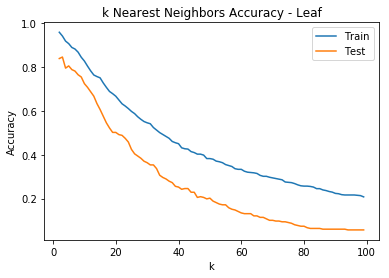

In [294]:
x_val = [x[0] for x in score]
y_val = [x[1] for x in score]

#print x_val
#plt.figure()

plt.title("k Nearest Neighbors Accuracy - Leaf")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.plot(x_val,y_val, label="Train")


x_val_test = [x[0] for x in testscore]
y_val_test = [x[1] for x in testscore]
plt.plot(x_val_test, y_val_test, label='Test')
plt.legend()
plt.savefig("k Nearest Neighbors Leaf Size - Leaf")
#plt.plot(x_val,y_val,'or')
#plt.show()

#plt.plot(score)

In [295]:
knnParameters = {'metric':('euclidean', 'minkowski'), 'n_neighbors':[2, 3, 5, 10]}
knnc = KNeighborsClassifier()
knnclf = GridSearchCV(knnc, knnParameters, cv=3)
knnclf.fit(X_train, y_train)

/Users/abhisheksoni/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'metric': ('euclidean', 'minkowski'), 'n_neighbors': [2, 3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [296]:
knnclf.n_splits_

3

In [297]:
knnclf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [298]:
knnclf.best_score_

0.810966810966811

In [299]:
knn_best = knnclf.best_estimator_

In [300]:
%%timeit
knn_best.fit(X_train, y_train)

3.73 ms ± 177 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [301]:
%%timeit
knn_best.score(X_test, y_test)

58.3 ms ± 3.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [302]:
knn_train_error = []
knn_test_error = []
for i in range(1, 10):
    X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(df_train, y_train, test_size=i/10.0)
    #print(X_test_dt.shape)
    del X_train_knn["Target"]
    knn_best.fit(X_train_knn, y_train_knn)
   # print("test size is ", i/10.0)
    knn_train_error.append((X_train_knn.shape[0], 1.0 - knn_best.score(X_train_knn, y_train_knn)))
    knn_test_error.append((X_train_knn.shape[0], 1.0 - knn_best.score(X_test, y_test)))
  #  print("scores are ", knn_train_score[i-1], knn_test_score[i-1])

In [303]:
#knn_train_error

In [304]:
#knn_test_error

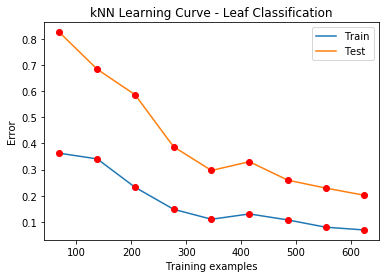

In [305]:
x_val = [x[0] for x in knn_train_error]
y_val = [x[1] for x in knn_train_error]

#print x_val
#plt.figure()

plt.title("kNN Learning Curve - Leaf Classification")
plt.xlabel("Training examples")
plt.ylabel("Error")
plt.plot(x_val,y_val, label='Train')
plt.plot(x_val,y_val,'or')
#plt.show()

x_val_test = [x[0] for x in knn_test_error]
y_val_test = [x[1] for x in knn_test_error]

plt.plot(x_val_test,y_val_test, label='Test')
plt.plot(x_val_test,y_val_test,'or')
plt.legend()
plt.savefig("Leaf kNN Learning Curve")
#plt.show()

In [306]:
nn = MLPClassifier()
nn.fit(X_train, y_train)

/Users/abhisheksoni/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [307]:
nnPredictions = nn.predict(X_test)

In [308]:
nn.score(X_test, y_test)

0.7878787878787878

In [309]:
nnIterscore = []
for i in range(10, 300, 10):
    nntest = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(40,40), max_iter = i, random_state=1)
    nntest.fit(X_train, y_train)
    nnIterscore.append((i, nntest.score(X_train, y_train)))
    
nnIterscoretest = []
for i in range(10, 300, 10):
    nntest = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(40,40), max_iter = i, random_state=1)
    nntest.fit(X_train, y_train)
    nnIterscoretest.append((i, nntest.score(X_test, y_test)))

In [310]:
#nnIterscore

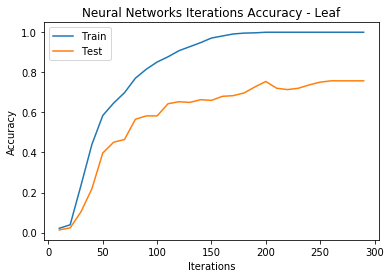

In [311]:
x_val = [x[0] for x in nnIterscore]
y_val = [x[1] for x in nnIterscore]

#print x_val
#plt.figure()

plt.title("Neural Networks Iterations Accuracy - Leaf")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(x_val,y_val, label="Train")

x_val_test = [x[0] for x in nnIterscoretest]
y_val_test = [x[1] for x in nnIterscoretest]
plt.plot(x_val_test,y_val_test, label="Test")
plt.legend()
plt.savefig("Neural Networks Iterations Accuracy - Leaf")
#plt.plot(x_val,y_val,'or')
#plt.show()

In [312]:
score = []
elements = 5
for i in range(1, 11):
    size = (50, )*i
    #print("size, ", size)
    nntest = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=size, random_state=1)
    nntest.fit(X_train, y_train)
    score.append((i, nntest.score(X_train, y_train)))
    
testscore = []
for i in range(1, 11):
    size = (50, )*i
    #print("size, ", size)
    nntest = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=size, random_state=1)
    nntest.fit(X_train, y_train)
    testscore.append((i, nntest.score(X_test, y_test)))
#lm = linear_model.LinearRegression()
#model = lm.fit(X_train, y_train)
#dt.fit(X_train, y_train)

In [313]:
#score

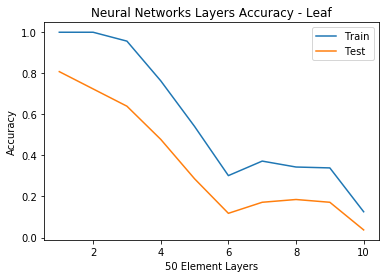

In [314]:
x_val = [x[0] for x in score]
y_val = [x[1] for x in score]

#print x_val
#plt.figure()

plt.title("Neural Networks Layers Accuracy - Leaf")
plt.xlabel("50 Element Layers")
plt.ylabel("Accuracy")
plt.plot(x_val,y_val, label="Train")

x_val_test = [x[0] for x in testscore]
y_val_test = [x[1] for x in testscore]
plt.plot(x_val_test, y_val_test, label="Test")
plt.legend()
plt.savefig("Neural Networks Layers Accuracy - Leaf")
#plt.plot(x_val,y_val,'or')
#plt.show()

In [315]:
parameters = {'activation':('identity', 'logistic', 'tanh', 'relu'), 
              'hidden_layer_sizes':[(30,30), (40, 40), (45,45), (50,50)]}
nnc = nn = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1)
nnclf = GridSearchCV(nnc, parameters, cv=3, return_train_score = True)
nnclf.fit(X_train, y_train)

/Users/abhisheksoni/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=3, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'activation': ('identity', 'logistic', 'tanh', 'relu'), 'hidden_layer_sizes': [(30, 30), (40, 40), (45, 45), (50, 50)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [316]:
nnclf.n_splits_

3

In [317]:
def report(results, n_top=10):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [318]:
report(nnclf.cv_results_)

Model with rank: 1
Mean validation score: 0.776 (std: 0.023)
Parameters: {'activation': 'identity', 'hidden_layer_sizes': (30, 30)}

Model with rank: 1
Mean validation score: 0.776 (std: 0.036)
Parameters: {'activation': 'identity', 'hidden_layer_sizes': (50, 50)}

Model with rank: 3
Mean validation score: 0.750 (std: 0.017)
Parameters: {'activation': 'identity', 'hidden_layer_sizes': (40, 40)}

Model with rank: 4
Mean validation score: 0.730 (std: 0.044)
Parameters: {'activation': 'identity', 'hidden_layer_sizes': (45, 45)}

Model with rank: 5
Mean validation score: 0.706 (std: 0.027)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (45, 45)}

Model with rank: 6
Mean validation score: 0.681 (std: 0.017)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (50, 50)}

Model with rank: 7
Mean validation score: 0.677 (std: 0.021)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (40, 40)}

Model with rank: 8
Mean validation score: 0.661 (std: 0.039)
Parameters: {'activa

In [319]:
nnclf.best_estimator_

MLPClassifier(activation='identity', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [320]:
nnclf.best_score_

0.7763347763347763

In [321]:
nn_best = nnclf.best_estimator_

In [322]:
%%timeit
nn_best.fit(X_train, y_train)

1.02 s ± 166 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [323]:
%%timeit
nn_best.score(X_test, y_test)

1.51 ms ± 15.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [324]:
nn_train_error = []
nn_test_error = []
for i in range(1, 10):
    X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(df_train, y_train, test_size=i/10.0)
    #print(X_test_dt.shape)
    del X_train_nn["Target"]
    nn_best.fit(X_train_nn, y_train_nn)
   # print("test size is ", i/10.0)
    nn_train_error.append((X_train_nn.shape[0], 1.0 - nn_best.score(X_train_nn, y_train_nn)))
    nn_test_error.append((X_train_nn.shape[0], 1.0 - nn_best.score(X_test, y_test)))

In [325]:
#nn_train_error

In [326]:
#nn_test_error

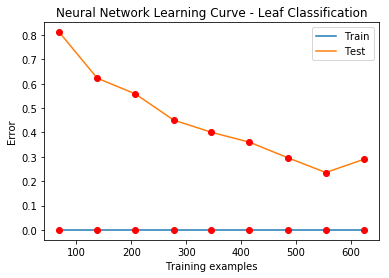

In [327]:
x_val = [x[0] for x in nn_train_error]
y_val = [x[1] for x in nn_train_error]

#print x_val
#plt.figure()

plt.title("Neural Network Learning Curve - Leaf Classification")
plt.xlabel("Training examples")
plt.ylabel("Error")
plt.plot(x_val,y_val, label="Train")
plt.plot(x_val,y_val,'or')
#plt.show()

x_val_test = [x[0] for x in nn_test_error]
y_val_test = [x[1] for x in nn_test_error]

plt.plot(x_val_test,y_val_test, label="Test")
plt.plot(x_val_test,y_val_test,'or')
plt.legend()
plt.savefig("Leaf Neural Network Learning Curve")
#plt.show()

In [328]:
sv = svm.SVC()
sv.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [329]:
svmPredictions = sv.predict(X_test)

In [330]:
sv.score(X_test, y_test)

0.0

In [331]:
linear_svc = svm.SVC(kernel='linear')

In [332]:
linear_svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [333]:
linearsvmPredictions = linear_svc.predict(X_test)

In [334]:
linear_svc.score(X_test, y_test)

0.016835016835016835

In [335]:
iterscore = []
for i in range(1, 20):
    svctest = svm.SVC(kernel='linear', C=50, max_iter=i)
    svctest.fit(X_train, y_train)
    iterscore.append((i, svctest.score(X_train, y_train)))

iterscoretest = []
for i in range(1, 20):
    svctest = svm.SVC(kernel='linear', C=50, max_iter=i)
    svctest.fit(X_train, y_train)
    iterscoretest.append((i, svctest.score(X_test, y_test)))

/Users/abhisheksoni/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/abhisheksoni/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/abhisheksoni/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/abhisheksoni/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceW

In [336]:
#iterscore

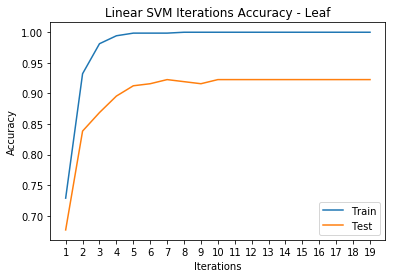

In [337]:
x_val = [x[0] for x in iterscore]
y_val = [x[1] for x in iterscore]

#print x_val
#plt.figure()

plt.title("Linear SVM Iterations Accuracy - Leaf")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, 20, 1))
plt.plot(x_val,y_val, label="Train")

x_val_test = [x[0] for x in iterscoretest]
y_val_test = [x[1] for x in iterscoretest]
plt.plot(x_val_test,y_val_test, label="Test")
plt.legend()
plt.savefig("SVM Iterations Accuracy - Leaf")
#plt.plot(x_val,y_val,'or')
#plt.show()
#plt.plot(score)

In [338]:
score = []
for i in range(1, 50):
    svctest = svm.SVC(kernel='linear', C=i)
    svctest.fit(X_train, y_train)
    score.append((i, svctest.score(X_train, y_train)))
    
testscore = []
for i in range(1, 50):
    svctest = svm.SVC(kernel='linear', C=i)
    svctest.fit(X_train, y_train)
    testscore.append((i, svctest.score(X_test, y_test)))

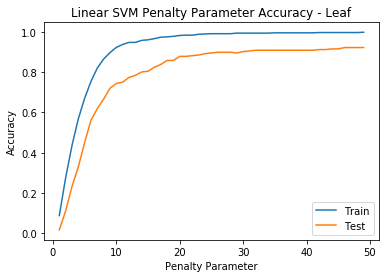

In [339]:
x_val = [x[0] for x in score]
y_val = [x[1] for x in score]

#print x_val
#plt.figure()

plt.title("Linear SVM Penalty Parameter Accuracy - Leaf")
plt.xlabel("Penalty Parameter")
plt.ylabel("Accuracy")
plt.plot(x_val,y_val, label="Train")

x_val_test = [x[0] for x in testscore]
y_val_test = [x[1] for x in testscore]
plt.plot(x_val_test, y_val_test, label="Test")
plt.legend()
plt.savefig("SVM Penalty Parameter Accuracy - Leaf")
#plt.plot(x_val,y_val,'or')
#plt.show()
#plt.plot(score)

In [340]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 20, 30, 40, 50, 100]}
svc = svm.SVC()
svcclf = GridSearchCV(svc, parameters, cv=3)
svcclf.fit(X_train, y_train)

/Users/abhisheksoni/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10, 20, 30, 40, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [341]:
svcclf.n_splits_

3

In [342]:
svcclf.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [343]:
svcclf.best_score_

0.9177489177489178

In [344]:
svc_best = svcclf.best_estimator_

In [345]:
%%timeit
svc_best.fit(X_train, y_train)

207 ms ± 12.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [346]:
%%timeit
svc_best.score(X_test, y_test)

69.6 ms ± 4.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [347]:
svc_train_error = []
svc_test_error = []
for i in range(1, 10):
    X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(df_train, y_train, test_size=i/10.0)
    #print(X_test_dt.shape)
    del X_train_svc["Target"]
    svc_best.fit(X_train_svc, y_train_svc)
    svc_train_error.append((X_train_svc.shape[0], 1.0 - svc_best.score(X_train_svc, y_train_svc)))
    svc_test_error.append((X_train_svc.shape[0], 1.0 - svc_best.score(X_test, y_test)))

In [348]:
#svc_train_error

In [349]:
#svc_test_error

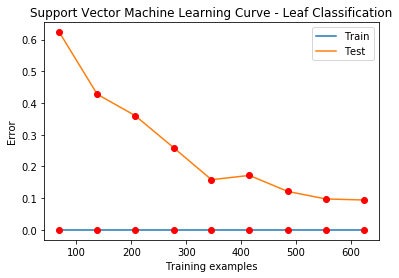

In [350]:
x_val = [x[0] for x in svc_train_error]
y_val = [x[1] for x in svc_train_error]

#print x_val
#plt.figure()

plt.title("Support Vector Machine Learning Curve - Leaf Classification")
plt.xlabel("Training examples")
plt.ylabel("Error")
plt.plot(x_val,y_val, label="Train")
plt.plot(x_val,y_val,'or')
#plt.show()

x_val_test = [x[0] for x in svc_test_error]
y_val_test = [x[1] for x in svc_test_error]

plt.plot(x_val_test,y_val_test, label="Test")
plt.plot(x_val_test,y_val_test,'or')
plt.legend()
plt.savefig("Leaf SVM Learning Curve")
#plt.show()

In [351]:
boost = AdaBoostClassifier(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))

In [352]:
boost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [353]:
boostPredictions = boost.predict(X_test)

In [354]:
boost.score(X_test, y_test)

0.8956228956228957

In [355]:
score = []
for i in range(20, 100, 20):
    print("i, ", i)
    DTC = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
    boosttest = AdaBoostClassifier(DTC, n_estimators=i)
    boosttest.fit(X_train, y_train)
    score.append((i, boosttest.score(X_train, y_train)))

testscore = []
for i in range(20, 100, 20):
    print("i, ", i)
    DTC = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
    boosttest = AdaBoostClassifier(DTC, n_estimators=i)
    boosttest.fit(X_train, y_train)
    testscore.append((i, boosttest.score(X_test, y_test)))

i,  20
i,  40
i,  60
i,  80
i,  20
i,  40
i,  60
i,  80


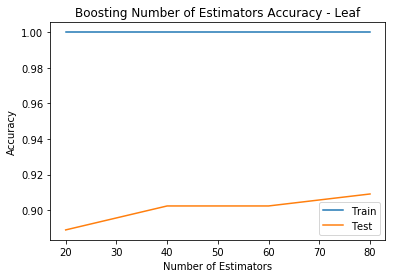

In [356]:
x_val = [x[0] for x in score]
y_val = [x[1] for x in score]

#print x_val
#plt.figure()

plt.title("Boosting Number of Estimators Accuracy - Leaf")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.plot(x_val,y_val, label="Train")

x_val_test = [x[0] for x in testscore]
y_val_test = [x[1] for x in testscore]
plt.plot(x_val_test,y_val_test, label="Test")
plt.legend()
plt.savefig("Boosting Estimators Accuracy - Leaf")
#plt.plot(x_val,y_val,'or')
#plt.show()
#plt.plot(score)

In [357]:
boostparameters = {'n_estimators':[10, 25, 50, 75], 'learning_rate':[0.1,0.25,0.5,1.0]}
DTC = DecisionTreeClassifier(min_samples_split=20, max_depth=10, random_state=99)
boostc = AdaBoostClassifier(base_estimator = DTC)
boostclf = GridSearchCV(boostc, boostparameters, cv=3)
boostclf.fit(X_train, y_train)

/Users/abhisheksoni/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=3, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 25, 50, 75], 'learning_rate': [0.1, 0.25, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [358]:
boostclf.n_splits_

3

In [359]:
boostclf.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best'),
          learning_rate=0.25, n_estimators=75, random_state=None)

In [360]:
boostclf.best_score_

0.7287157287157288

In [361]:
boost_best = boostclf.best_estimator_

In [362]:
%%timeit
boost_best.fit(X_train, y_train)

11.7 s ± 801 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [363]:
%%timeit
boost_best.score(X_test, y_test)

89 ms ± 7.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [364]:
boost_train_error = []
boost_test_error = []
for i in range(1, 10):
    X_train_boost, X_test_boost, y_train_boost, y_test_boost = train_test_split(df_train, y_train, test_size=i/10.0)
    #print(X_test_dt.shape)
    del X_train_boost["Target"]
    boost_best.fit(X_train_boost, y_train_boost)
    boost_train_error.append((X_train_boost.shape[0], 1.0 - boost_best.score(X_train_boost, y_train_boost)))
    boost_test_error.append((X_train_boost.shape[0], 1.0 - boost_best.score(X_test, y_test)))

In [365]:
#boost_train_error

In [366]:
#boost_test_error

In [8]:
x_val = [x[0] for x in boost_train_error]
y_val = [x[1] for x in boost_train_error]

#print x_val
#plt.figure()

plt.title("Boosting Learning Curve - Leaf Classification")
plt.xlabel("Training examples")
plt.ylabel("Error")
plt.plot(x_val,y_val, label="Train")
plt.plot(x_val,y_val,'or')
#plt.show()

x_val_test = [x[0] for x in boost_test_error]
y_val_test = [x[1] for x in boost_test_error]

plt.plot(x_val_test,y_val_test, label="Test")
plt.plot(x_val_test,y_val_test,'or')
plt.legend()
plt.savefig("Boosting Learning Curve")
#plt.show()

NameError: name 'boost_train_error' is not defined